# Paddle OCR

중국의 인터넷 기업인 바이두가 만든 딥러닝 플랫폼 PaddlePaddle로 구현된 오픈소스 OCR이다.<br/>
다양한 언어를 지원하며, 이미지와 문서에서 텍스트를 인식할 수 있다. <br/>
PaddleOCR의 경량 모델은 14.8M로 매우 가벼워 모바일 등 다양한 플랫폼에서 사용이 가능하다. <br/>
중국어, 영어 이외에도 한국어를 포함하여 80개 이상의 다양한 언어를 지원한다. <br/>

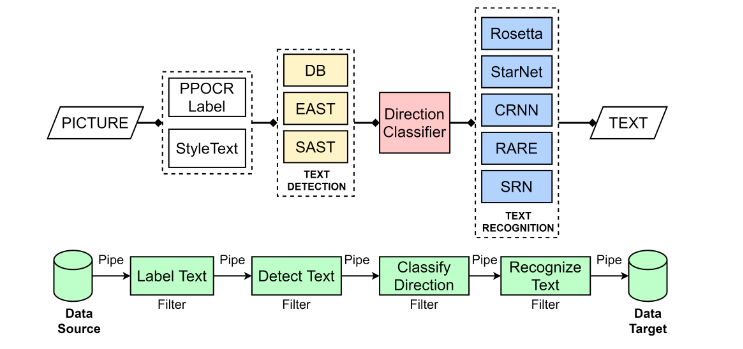

## Detection (텍스트 영역 검출) 모델
|Detection 모델|특징|
|----|----|
|DB(Differentiable Binarization)| - PP-OCR의 기본 detcion 모델 <br/> - 텍스트의 경계(boundary)를 부드럽게 예측하는 기법 <br/> - 일반적인 binary thresholding 대신, end-to-end 학습 가능 <br/> - 빠르고 정확도가 높아 다양한 실사용에 적합|
|EAST(Efficient and Accurate Scene Text Detector)| - 자연 이미지 속 장문의 텍스트 검출에 강함 <br/> - Bounding box를 바로 회귀(regression) 하는 방식식 <br/> - DB보다 구조가 단순하지만 복잡한 장면에서는 성능이 약간 떨어질 수 있음|
|SAST (Single Shot Arbitrarily-Shaped Text Detector)| - 복잡한 형태(곡선 포함) 텍스트를 검출하는데 강함 <br/> - 직접 회전 정보와 텍스트의 형태를 예측함|
|CTD (Curve Text Detector)| - 곡선 형태의 텍스트 인식 전용 <br/> - 길게 휘어진 텍스트에도 대응 가능|

<br/>

<b>요약:</b>

> PP-OCR(v2, v3) 기준 기본은 DB모델을 사용, 필요에 따라 곡선, 복잡한 환경에선 SAST, CTD 등을 선택할 수 있다.


## Recognition (텍스트 인식) 모델
|Recognition 모델|특징|
|----|----|
|CRNN (Convolutional Recurrent Neural Network)| - CNN + RNN 조합 <br/> - 이미지 특징 추출(CNN) → 시퀀스 모델링(RNN) → CTC Loss 사용 <br/> - OCR 기본형. 빠르고 가벼워서 많이 쓰임|
|RARE (Robust Attention-based Recognition)| - Attention Mechanism 활용 <br/> - 이미지 내 왜곡(distortion) 보정 가능 <br/> - 복잡하게 뒤틀린 텍스트에도 강함|
|SRN (Sequence Recognition Network)| - Self-Attention 기반 <br/> - 전체 시퀀스 context를 적극 활용해서 인식 정확도 향상 <br/> - 다소 무겁지만 복잡한 장면에서 뛰어난 성능|
|SVTR (Simple Visual Transformer)| - Transformer 계열 모델 <br/> - Vision Transformer 구조를 OCR에 최적화 <br/> - 최근 PP-OCRv3에서 채택, 가벼우면서도 정확도 매우 높음|
|NRTR (No-Recurrence Sequence-to-Sequence Model)| - RNN 없이 Transformer만 사용 <br/> - 긴 텍스트 인식에 최적화|

## 사용 모델
- v3 한국어 초경량 PP-OCRv3 모델을 사용
- Detection은 은 DB 기반
- Recoginition은 SVTR 기반

In [ ]:
pip install paddlepaddle # for gpu user please install paddlepaddle-gpu

In [ ]:
pip install paddleocr

⚠️ 설치 왕왕 오래 걸림

## 기본 V2 PaddleOCR Model 적용

[2025/04/28 15:05:32] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\user/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\user/.paddleocr/whl\\rec\\korean\\korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_sha

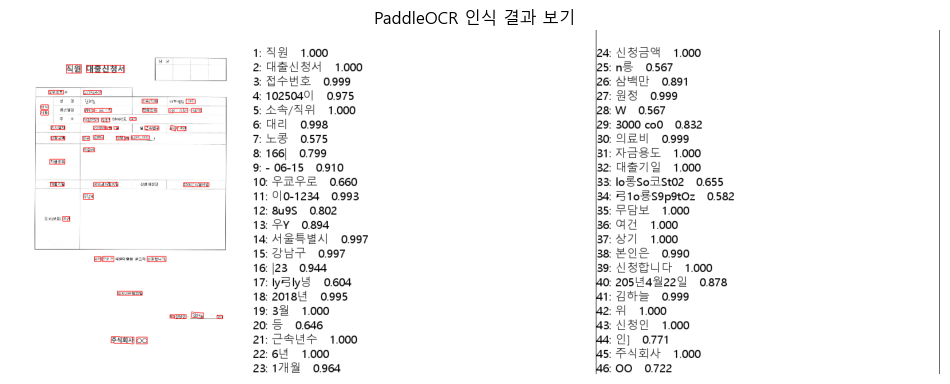

In [7]:
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import numpy as np

# === 폰트 설정 추가! ===
matplotlib.rc('font', family='Malgun Gothic')  # Windows는 '맑은 고딕'
# 한글 깨짐 방지 + 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# === 1. PaddleOCR 객체 만들기 ===
ocr = PaddleOCR(
    use_angle_cls=True,
    lang='korean'  # 한국어 모델 사용
    # det_model_dir=...,
    # rec_model_dir=...  # v3 쓸 거면 여기 따로 지정
)

# === 2. 이미지 경로 ===
image_path = "../documents/직원대출신청서_5개모음집_pages-to-jpg-0001.jpg"

# === 3. OCR 실행 ===
results = ocr.ocr(image_path, cls=True) #cls=True:기울어지거나 뒤집힌 글자를 자동 보정해서 인식함

# === 4. OCR 결과 출력 (텍스트 + 신뢰도) ===
for line in results[0]:  # PaddleOCR 결과는 리스트 안에 리스트
    bbox, (text, confidence) = line
    print(f"텍스트: {text} (신뢰도: {confidence:.2f})")

# === 5. OCR 결과 시각화 ===
# 이미지 로드
image = Image.open(image_path).convert('RGB')

# bbox, text, score 뽑아서 draw_ocr에 넘김
boxes = [element[0] for element in results[0]]
txts = [element[1][0] for element in results[0]]
scores = [element[1][1] for element in results[0]]

# OCR 결과를 이미지 위에 그림
image_with_boxes = draw_ocr(
    np.array(image),
    boxes,
    txts,
    scores,
    font_path='C:/Windows/Fonts/malgun.ttf'  # 한글 깨지지 않게 '맑은 고딕' 지정
)

# === 6. 시각화
plt.figure(figsize=(12, 12))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.title("PaddleOCR 인식 결과 보기")
plt.show()


[2025/04/28 15:31:30] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\user/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\user/.paddleocr/whl\\rec\\korean\\korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_sha

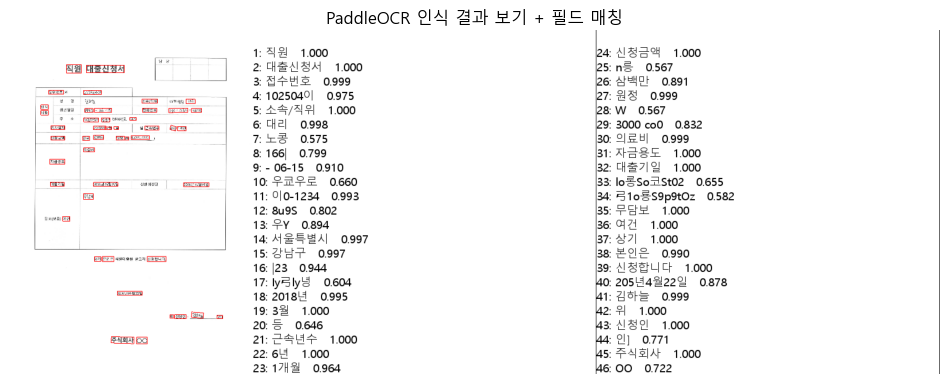

In [17]:
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import numpy as np
import json

# === 폰트 설정 추가! ===
matplotlib.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# === 1. PaddleOCR 객체 만들기 ===
ocr = PaddleOCR(
    use_angle_cls=True,
    lang='korean'
)

# === 2. 이미지 경로 설정 ===
image_path = "../documents/직원대출신청서_5개모음집_pages-to-jpg-0001.jpg"

# === 3. 필드 템플릿 JSON 불러오기 ===
field_template_path = "./field_template_boxes.json"  # 네가 만든 json 파일 경로
with open(field_template_path, "r", encoding="utf-8") as f:
    field_template = json.load(f)

# === 4. OCR 실행 ===
results = ocr.ocr(image_path, cls=True)

# === 5. 필드별 결과 초기화
extracted_fields = {field: {"text": "", "confidence": 0.0} for field in field_template.keys()}

# === 6. 박스 안에 들어가는지 체크 함수
def is_inside(box, point):
    x_min = min(box['top_left'][0], box['bottom_left'][0])
    x_max = max(box['top_right'][0], box['bottom_right'][0])
    y_min = min(box['top_left'][1], box['top_right'][1])
    y_max = max(box['bottom_left'][1], box['bottom_right'][1])
    x, y = point
    return x_min <= x <= x_max and y_min <= y <= y_max

# === 7. OCR 결과 -> 필드 매칭
for line in results[0]:
    bbox, (text, confidence) = line
    pts = np.array(bbox)
    center_x = int(np.mean(pts[:, 0]))
    center_y = int(np.mean(pts[:, 1]))
    center_point = (center_x, center_y)

    for field_name, field_box in field_template.items():
        if is_inside(field_box, center_point):
            if extracted_fields[field_name]["text"]:
                extracted_fields[field_name]["text"] += " " + text
                extracted_fields[field_name]["confidence"] = (extracted_fields[field_name]["confidence"] + confidence) / 2
            else:
                extracted_fields[field_name]["text"] = text
                extracted_fields[field_name]["confidence"] = confidence
            break

# === 8. 최종 필드 결과 출력
print("\n✅ 최종 필드별 매칭 결과:")
for field, info in extracted_fields.items():
    print(f"{field}: {info['text']} (신뢰도: {info['confidence']:.2f})")

# === 9. OCR 결과 시각화 ===
# 이미지 로드
image = Image.open(image_path).convert('RGB')

# bbox, text, score 뽑아서 draw_ocr에 넘김
boxes = [element[0] for element in results[0]]
txts = [element[1][0] for element in results[0]]
scores = [element[1][1] for element in results[0]]

# OCR 결과를 이미지 위에 그림
image_with_boxes = draw_ocr(
    np.array(image),
    boxes,
    txts,
    scores,
    font_path='C:/Windows/Fonts/malgun.ttf'
)

# === 10. 시각화
plt.figure(figsize=(12, 12))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.title("PaddleOCR 인식 결과 보기 + 필드 매칭")
plt.show()


## 한국어 초경량 PP-OCRv3 모델 적용

[2025/04/28 15:15:37] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='./models/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.4, det_db_unclip_ratio=2.0, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='./models/korean_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_

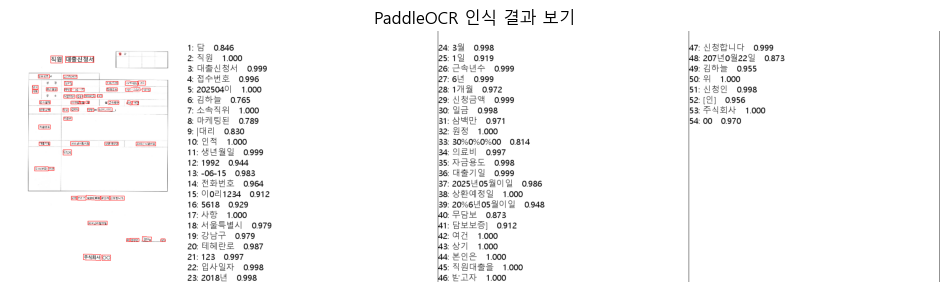

In [10]:
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import numpy as np

# === 폰트 설정 추가! ===
matplotlib.rc('font', family='Malgun Gothic')  # Windows는 '맑은 고딕'
# 한글 깨짐 방지 + 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# === 1. PaddleOCR 객체 만들기 ===
ocr = PaddleOCR(
    use_angle_cls=False,
    lang='korean',  # 한국어 모델 사용
    det_db_box_thresh=0.4,   # 🔥 텍스트 박스 검출 임계값 낮춰주기
    det_db_unclip_ratio=2.0, # 🔥 텍스트 박스 확장 비율 높여주기
    det_model_dir="./models/Multilingual_PP-OCRv3_det_infer",
    rec_model_dir="./models/korean_PP-OCRv3_rec_infer"
)

# === 2. 이미지 경로 ===
image_path = "../documents/직원대출신청서_5개모음집_pages-to-jpg-0001.jpg"

# === 3. OCR 실행 ===
results = ocr.ocr(image_path, cls=True) #cls=True:기울어지거나 뒤집힌 글자를 자동 보정해서 인식함

# === 4. OCR 결과 출력 (텍스트 + 신뢰도) ===
for line in results[0]:  # PaddleOCR 결과는 리스트 안에 리스트
    bbox, (text, confidence) = line
    print(f"텍스트: {text} (신뢰도: {confidence:.2f})")

# === 5. OCR 결과 시각화 ===
# 이미지 로드
image = Image.open(image_path).convert('RGB')

# bbox, text, score 뽑아서 draw_ocr에 넘김
boxes = [element[0] for element in results[0]]
txts = [element[1][0] for element in results[0]]
scores = [element[1][1] for element in results[0]]

# OCR 결과를 이미지 위에 그림
image_with_boxes = draw_ocr(
    np.array(image),
    boxes,
    txts,
    scores,
    font_path='C:/Windows/Fonts/malgun.ttf'  # 한글 깨지지 않게 '맑은 고딕' 지정
)

# === 6. 시각화
plt.figure(figsize=(12, 12))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.title("PaddleOCR 인식 결과 보기")
plt.show()

[2025/04/28 15:20:07] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='./models/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.4, det_db_unclip_ratio=2.0, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='./models/korean_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_

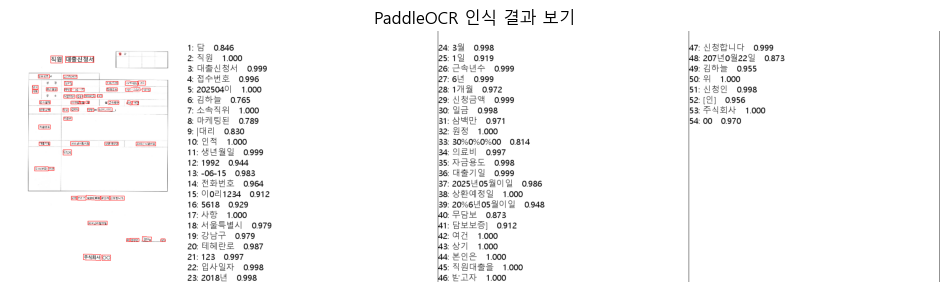

In [13]:
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import numpy as np

# === 폰트 설정 추가! ===
matplotlib.rc('font', family='Malgun Gothic')  # Windows는 '맑은 고딕'
# 한글 깨짐 방지 + 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# === 1. PaddleOCR 객체 만들기 ===
ocr = PaddleOCR(
    use_angle_cls=False,
    lang='korean',  # 한국어 모델 사용
    det_db_box_thresh=0.4,   # 🔥 텍스트 박스 검출 임계값 낮춰주기
    det_db_unclip_ratio=2.0, # 🔥 텍스트 박스 확장 비율 높여주기
    det_model_dir="./models/Multilingual_PP-OCRv3_det_infer",
    rec_model_dir="./models/korean_PP-OCRv3_rec_infer"
)

# === 2. 이미지 경로 ===
image_path = "../documents/직원대출신청서_5개모음집_pages-to-jpg-0001.jpg"
image = Image.open(image_path).convert('RGB')
image_np = np.array(image)

# === 3. OCR 실행 ===
#results = ocr.ocr(image_path, cls=True) #cls=True:기울어지거나 뒤집힌 글자를 자동 보정해서 인식함
results = ocr.ocr(image_np, cls=False)

# === 4. OCR 결과 출력 (텍스트 + 신뢰도) ===
for line in results[0]:  # PaddleOCR 결과는 리스트 안에 리스트
    bbox, (text, confidence) = line
    print(f"텍스트: {text} (신뢰도: {confidence:.2f})")

# === 5. OCR 결과 시각화 ===
# 이미지 로드
image = Image.open(image_path).convert('RGB')

# bbox, text, score 뽑아서 draw_ocr에 넘김
boxes = [element[0] for element in results[0]]
txts = [element[1][0] for element in results[0]]
scores = [element[1][1] for element in results[0]]

# OCR 결과를 이미지 위에 그림
image_with_boxes = draw_ocr(
    np.array(image),
    boxes,
    txts,
    scores,
    font_path='C:/Windows/Fonts/malgun.ttf'  # 한글 깨지지 않게 '맑은 고딕' 지정
)

# === 6. 시각화
plt.figure(figsize=(12, 12))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.title("PaddleOCR 인식 결과 보기")
plt.show()

## 미리 정의된 box JSON 파일로 field 자동 매칭시키기

In [14]:
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import numpy as np
import json

# === 폰트 설정 추가! ===
matplotlib.rc('font', family='Malgun Gothic')  # Windows는 '맑은 고딕'
# 한글 깨짐 방지 + 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# === 1. PaddleOCR 객체 만들기 ===
ocr = PaddleOCR(
    use_angle_cls=False,
    lang='korean',  # 한국어 모델 사용
    det_db_box_thresh=0.4,   # 🔥 텍스트 박스 검출 임계값 낮춰주기
    det_db_unclip_ratio=2.0, # 🔥 텍스트 박스 확장 비율 높여주기
    det_model_dir="./models/Multilingual_PP-OCRv3_det_infer",
    rec_model_dir="./models/korean_PP-OCRv3_rec_infer"
)

# === 2. 이미지 경로 ===
image_path = "../documents/직원대출신청서_5개모음집_pages-to-jpg-0001.jpg"
image = Image.open(image_path).convert('RGB')
image_np = np.array(image)

# === 3. OCR 실행 ===
#results = ocr.ocr(image_path, cls=True) #cls=True:기울어지거나 뒤집힌 글자를 자동 보정해서 인식함
results = ocr.ocr(image_np, cls=False)

# === 4. 미리 정의된 field_template 불러오기
with open('field_template_boxes.json', 'r', encoding='utf-8') as f:
    field_template = json.load(f)

# === 5. 결과 초기화
extracted_fields = {field: {"text": "", "confidence": 0.0} for field in field_template.keys()}

# === 6. 박스 안에 들어가는지 체크
def is_inside(box, point):
    x_min = min(box['top_left'][0], box['bottom_left'][0])
    x_max = max(box['top_right'][0], box['bottom_right'][0])
    y_min = min(box['top_left'][1], box['top_right'][1])
    y_max = max(box['bottom_left'][1], box['bottom_right'][1])
    x, y = point
    return x_min <= x <= x_max and y_min <= y <= y_max

# === 7. 매칭 작업
for line in results[0]:  # PaddleOCR는 results[0]
    bbox, (text, confidence) = line
    pts = np.array(bbox)
    center_x = int(np.mean(pts[:, 0]))
    center_y = int(np.mean(pts[:, 1]))
    center_point = (center_x, center_y)

    for field_name, field_box in field_template.items():
        if is_inside(field_box, center_point):
            if extracted_fields[field_name]["text"]:
                extracted_fields[field_name]["text"] += " " + text
                extracted_fields[field_name]["confidence"] = (extracted_fields[field_name]["confidence"] + confidence) / 2
            else:
                extracted_fields[field_name]["text"] = text
                extracted_fields[field_name]["confidence"] = confidence
            break

# === 8. 최종 결과
for field, info in extracted_fields.items():
    print(f"{field}: {info['text']} (Confidence: {info['confidence']:.2f})")

[2025/04/28 15:23:04] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='./models/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.4, det_db_unclip_ratio=2.0, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='./models/korean_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_

## 손글씨 전처리 (결과 -> 더 안좋아짐)

[2025/04/28 15:30:00] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='./models/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.4, det_db_unclip_ratio=2.0, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='./models/korean_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_

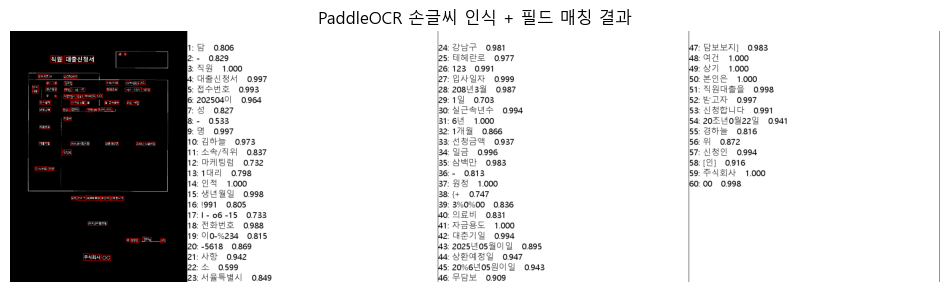

In [16]:
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import numpy as np
import cv2
import json

# === matplotlib 한글 폰트 설정 ===
matplotlib.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# === 한글 경로 대응용 이미지 로딩 ===
def load_image_with_pil(image_path):
    pil_image = Image.open(image_path).convert("RGB")
    return cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

# === 손글씨 전처리 함수 ===
def preprocess_for_handwriting(image_path):
    img = load_image_with_pil(image_path)

    # 1. 흑백 변환
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2. 이진화
    _, img_bin = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY_INV)

    # 3. 노이즈 제거
    img_blur = cv2.GaussianBlur(img_bin, (3, 3), 0)

    # 4. 선명도 강화
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    img_sharp = cv2.filter2D(img_blur, -1, kernel)

    # 5. 컬러로 변환 (PaddleOCR 요구사항)
    img_rgb = cv2.cvtColor(img_sharp, cv2.COLOR_GRAY2RGB)

    return img_rgb

# === 박스 안에 포인트가 포함됐는지 확인하는 함수 ===
def is_inside(box, point):
    x_min = min(box['top_left'][0], box['bottom_left'][0])
    x_max = max(box['top_right'][0], box['bottom_right'][0])
    y_min = min(box['top_left'][1], box['top_right'][1])
    y_max = max(box['bottom_left'][1], box['bottom_right'][1])
    x, y = point
    return x_min <= x <= x_max and y_min <= y <= y_max

# === PaddleOCR 객체 만들기 ===
ocr = PaddleOCR(
    use_angle_cls=False,  # 회전보정 OFF
    lang='korean',
    det_db_box_thresh=0.4,
    det_db_unclip_ratio=2.0,
    det_model_dir="./models/Multilingual_PP-OCRv3_det_infer",
    rec_model_dir="./models/korean_PP-OCRv3_rec_infer"
)

# === 1. 파일 경로 설정
image_path = "../documents/직원대출신청서_5개모음집_pages-to-jpg-0001.jpg"
field_template_path = "./field_template_boxes.json"  # 네가 드래그해서 만든 field 좌표 JSON

# === 2. 전처리된 이미지 준비
processed_image = preprocess_for_handwriting(image_path)

# === 3. PaddleOCR로 OCR 결과 추출
results = ocr.ocr(processed_image, cls=False)

# === 4. 필드 템플릿 로딩
with open(field_template_path, "r", encoding="utf-8") as f:
    field_template = json.load(f)

# === 5. 필드별 결과 초기화
extracted_fields = {field: {"text": "", "confidence": 0.0} for field in field_template.keys()}

# === 6. OCR 결과 -> 필드 매칭
for line in results[0]:
    bbox, (text, confidence) = line
    pts = np.array(bbox)
    center_x = int(np.mean(pts[:, 0]))
    center_y = int(np.mean(pts[:, 1]))
    center_point = (center_x, center_y)

    for field_name, field_box in field_template.items():
        if is_inside(field_box, center_point):
            if extracted_fields[field_name]["text"]:
                extracted_fields[field_name]["text"] += " " + text
                extracted_fields[field_name]["confidence"] = (extracted_fields[field_name]["confidence"] + confidence) / 2
            else:
                extracted_fields[field_name]["text"] = text
                extracted_fields[field_name]["confidence"] = confidence
            break

# === 7. 최종 결과 출력
print("\n✅ 최종 필드별 추출 결과:")
for field, info in extracted_fields.items():
    print(f"{field}: {info['text']} (신뢰도: {info['confidence']:.2f})")

# === 8. OCR 결과 박스 시각화
image_pil = Image.fromarray(processed_image)

boxes = [element[0] for element in results[0]]
txts = [element[1][0] for element in results[0]]
scores = [element[1][1] for element in results[0]]

image_with_boxes = draw_ocr(
    np.array(image_pil),
    boxes,
    txts,
    scores,
    font_path='C:/Windows/Fonts/malgun.ttf'
)

plt.figure(figsize=(12, 12))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.title("PaddleOCR 손글씨 인식 + 필드 매칭 결과")
plt.show()
